# Задания с кодом

### Поменять RGB компоненты местами

Необходимо реализовать функцию change_rgb, которая меняет местами красную (R) и синию (B) компоненты местами и возвращает измененное изображение.

Функция принимает на вход изображение img.

Решение:

In [13]:
from PIL import Image

def change_rgb(img):
    for y in range(img.height):
        for x in range(img.width):
            pixel = img.getpixel((x,y))
            pixel = (pixel[2],pixel[1],pixel[0])
            img.putpixel((x,y),pixel)
    return img


Тест:

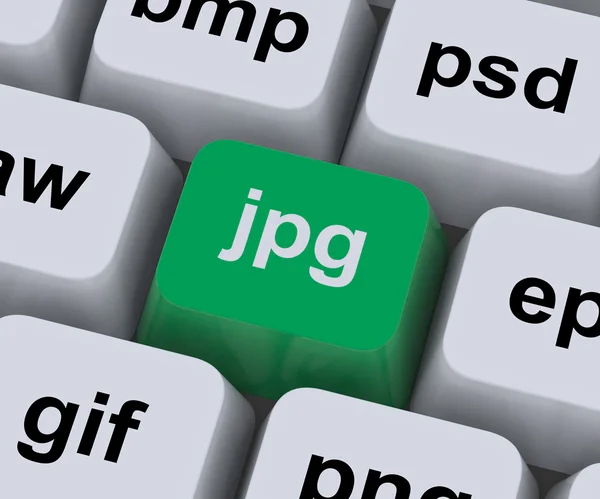

In [22]:
img = Image.open("jpg.jpg")
change_rgb(img)

### Инверсия пикселей изображения
Необходимо реализовать функцию inverse, которая инвертирует каждый пиксель изображения.

Функция принимает на вход изображение img.

Решение:

In [31]:
import cv2

def inverse(img):
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            img[y,x] = 255 - img[y,x]
    return img

Тест:

In [ ]:
img = cv2.imread("jpg.jpg")
img = inverse(img)
cv2.imshow("img",img)
cv2.waitKey(0)

### Обрезание изображения
Необходимо реализовать функцию crop_image, которая вырезает из изображения квадратную область. Функция должна вернуть обрезанное изображение.

Функция принимает на вход:

1) Изображение img

2) Координаты верхнего левого угла квадрата x0,y0

3) Длину стороны квадрата width


In [35]:
from PIL import Image

def crop_image(img,x0,y0,width):
    result_img = img.crop((x0,y0,x0+width,y0+width))
    return result_img

Тест:

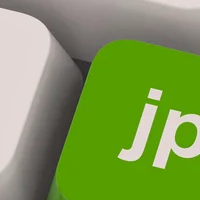

In [36]:
img = Image.open("jpg.jpg")
crop_image(img,100,100,200)

### Замена цветов пикселей на средний цвет вокруг

Необходимо реализовать функцию solve, которая заменяет цвет каждого пикселя в области на средний цвет пикселей вокруг (не считая сам этот писксель).

Функция solve() принимает на вход:

1) Изображение (img)

2) Координаты левого верхнего угла области (x0,y0)

3) Координаты правого верхнего угла области (x1,y1)

Функция должна заменить цвета каждого пикселя в этой области на средний цвет пикселей вокруг. 

Пиксели вокруг :

8 самых близких пикселей, если пиксель находится в центре изображения

5 самых близких пикселей, если пиксель находится у стенки

3 самых близких пикселя, если пиксель находится в угле

Средний цвет - берется целая часть от среднего каждой компоненты из rgb. *(int(sum(r)/count),int(sum(g)/count),int(sum(b)/count))*

In [38]:
from PIL import Image
import math


def solve(img,x0,y0,x1,y1):
    new_img = Image.new('RGB', img.size)
    h,w = img.size
    for i in range(h):
        for j in range(w):
            new_img.putpixel((i,j),img.getpixel((i,j)))
            
    for i in range(y1-y0):
        for j in range(x1-x0):
            x = x0+j
            y = y0+i
            
            r = 0
            g = 0
            b = 0
            count = 0
            for i_ in range(-1,2):
                for j_ in range(-1,2):
                    if not (i_==0 and j_==0):
                        if x+j_ < w and x+j_>=0 and y+i_<h and y+i_>=0:
                            p = img.getpixel((y+i_,x+j_))
                            r += p[0]
                            g += p[1]
                            b += p[2]
                            count+=1
            new_img.putpixel((y,x),(int(r/count),int(g/count),int(b/count)))
                            
    return new_img


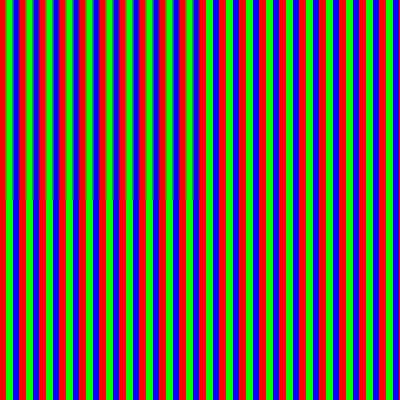

In [45]:
img = Image.open("colors.jpg")
solve(img,0,0,200,200)

### Преобразование изображения в черно-белое
Необходимо реализовать функцию solve. Данная функция должна преобразовать изображение из цветного в черно-белое.

Функция принимает на вход изображение img.

Для того, чтобы преобразовать изображение в черно-белое необходимо вычислить следующую величину из компонент каждого пикселя: 

C = 0.2989 * R + 0.5870 * G + 0.1140 * B

Затем заменить все компоненты пикселя этим значением. Значение C округляйте вниз до целого.

Функция должна вернуть измененное изображение.

Решение:

In [58]:
import cv2

def solve(img):
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            pix = img[y,x]
            C = int(0.2989*pix[2] + 0.587*pix[1] + 0.114*pix[0])
            img[y,x] = [C, C, C]
    return img

Тест:

In [60]:
img = cv2.imread("jpg.jpg")
img = solve(img)
cv2.imshow("img",img)
cv2.waitKey(0)

-1

### Поворот изображения
Необходимо реализовать функцию solve, которая поворачивает изображение по часовой стрелке на определенный угол.

Функция принимает на вход:
1) Изображение - img

2) Угол поворота - angle

3) Флаг того, можно ли обрезать края изображения - flag

Функция должна вернуть измененное изображение.

Решение:

In [61]:
def solve(img, angle, flag):
    return img.rotate(angle, expand = not flag)

Тест:

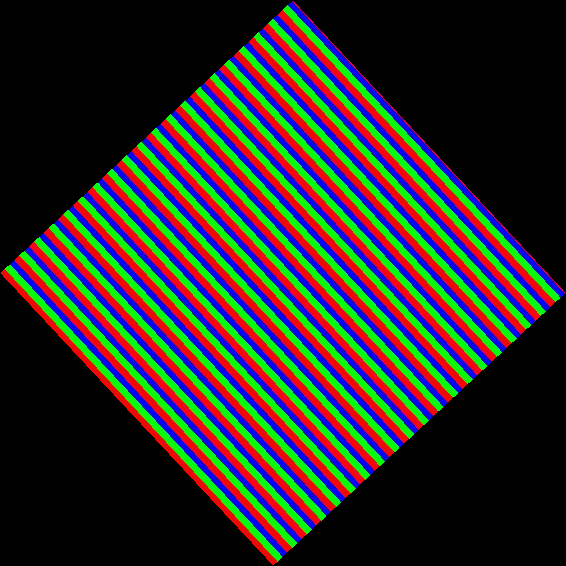

In [64]:
img = Image.open("colors.jpg")
solve(img,43,False)

### Треугольник
Необходимо написать функцию solve(), которая рисует на изображении треугольник

Функция solve() принимает на вход:

1) Изображение - img

2) Координаты вершин - x0,y0,x1,y1,x2,y2

3) Толщину линий - thickness

4) Цвет линий - color 
 

Функция должна вернуть обработанное изображение.

Решение:

In [74]:
import cv2
import numpy as np

def solve(img ,x0, y0, x1, y1, x2, y2, thickness, color):
    pts = np.array([[x0,y0],[x1,y1],[x2,y2]], np.int32)
    isClosed = True
    cv2.polylines(img, [pts], isClosed, color, thickness)
    return img


Тест:

In [75]:
img = cv2.imread("jpg.jpg")
img = solve(img, 0,100, 200,100, 100,200, 4, (255,0,0))
cv2.imshow("img",img)
cv2.waitKey(0)

-1

### Квадрат
Необходимо реализовать функцию solve, которая рисует на изображении квадрат.

Функция принимает на вход:

1) Изображение - Img

2) Координаты левого верхнего угла - x1, y1

3) Длину стороны квадрата - width

4) Толщину линий - thickness

5) Цвет линий - color

6) Флаг того, залит ли квадрат - filled (если True, то залит)

7) Цвет которым он залит - fillColor


Решение:

In [81]:
from PIL import Image, ImageDraw

def solve(img, x1, y1, width, thickness, color, filled, fillColor):
    x2 = x1+width
    y2 = y1+width
    idraw = ImageDraw.Draw(img)
    if filled:
        idraw.rectangle(xy=(x1, y1, x2, y2), outline=color, fill=fillColor, width=thickness)
    else:
        idraw.rectangle(xy=(x1, y1, x2, y2), outline=color, width=thickness)
    return img

Тест:

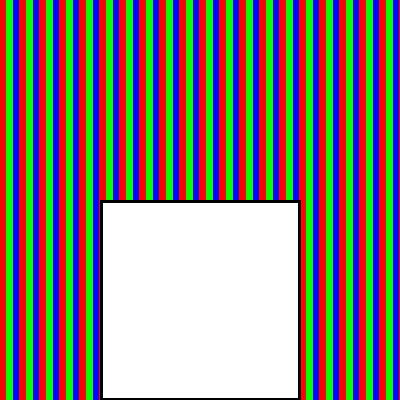

In [82]:
img = Image.open("colors.jpg")
solve(img, 100, 200, 200, 3, (0,0,0),True, (255,255,255))

### Отрезок
Необходимо реализовать функцию solve, которая рисует отрезок на изображении.

Функция принимает на вход:

1) Изображение

2) Координаты точек  - x0,y0,x1,y1

3) Цвет линии - color

4) Ширину линии - thickness

Решение:

In [86]:
import cv2

def solve(img, x0,y0,x1,y1,color,thickness):
    start_point = (x0,y0)
    end_point = (x1,y1)
    cv2.line(img,start_point,end_point,color,thickness)
    return img

Тест:

In [91]:
img = cv2.imread("jpg.jpg")
img = solve(img, 10,100, 400,300, (255,0,0),9)
cv2.imshow("img",img)
cv2.waitKey(0)

-1

### Поворот части изображения
Необходимо реализовать функцию solve, которая поворачивает квадратную область изображения на угол, кратный 90 градусам .

Функция принимает на вход:

1) Изображение - img

2) Координаты левого верхнего угла квадртаной области - x0,y0

3) Длину стороны области - width

4) Угол - angle (кратен 90)

Функция должна вернуть измененное изображение. 

Решение:

In [97]:
from PIL import Image

def solve(img, x0,y0, width, angle):
    sq = img.crop((x0,y0,x0+width,y0+width))
    sq = sq.rotate(angle)
    img.paste(sq,(x0,y0))
    return img

Тест:

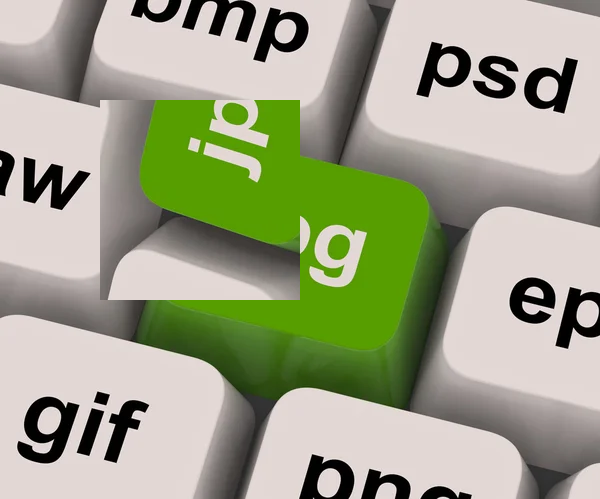

In [103]:
img = Image.open("jpg.jpg")
solve(img, 100,100, 200, 90)

### Инвертирование цвета в окружности
Необходимо реализовать функцию solve, которая инвертирует цвет в окружности.

Функция принимает на вход:

1) Изображение  - img

2) Координаты центра окружности - x_c,y_c

3) Радиус окружности - r

Если окружность не входит в изображение целиком, то нужно отрисовать ту ее часть, которая входит.

Решение:

In [115]:
def solve(img, x_c, y_c, r):
    x0 = x_c-r
    y0 = y_c-r
    x1 = x_c+r
    y1 = y_c+r
    
    for y in range(y0,y1+1):
        if y>= img.shape[0] or y<0:
            continue
        for x in range(x0,x1+1):
            if  x>=img.shape[1] or x<0:
                continue
            if (y_c-y)**2 + (x_c - x)**2 <= r**2:
                img[y,x] = 255 - img[y,x]
    return img
            

Тест:

In [116]:
img = cv2.imread("jpg.jpg")
img = solve(img, 100, 100,150)
cv2.imshow("img",img)
cv2.waitKey(0)

-1

### Изменение цвета в палитре
Необходимо реализовать функцию solve, которая принмает на вход изображение - img и, если изображение использует палитру цветов, заменяет второй цвет палитры на переданный - color.

Функция должна вернуть измененное изображение. Если изображение не использует палитру, то нужно вернуть исходное изображение.


Решение:

In [120]:
def solve(img, color):
    if img.mode != 'P':
        return img
    palette = img.getpalette()
    palette[3:6] = color
    img.putpalette(palette)
    return img

Тест:

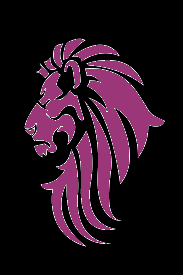

In [125]:
img = Image.open("lion.png")
solve(img,(155,55,120))

### Замена самого частого цвета
Необходимо реализовать функцию solve, которая заменяет самый часто встречающийся цвет в изображении на переданный.

Функция принимает на вход

1) Изображение - img

2) Цвет - color

In [196]:
import cv2

def get_color(img):
    colors=[]
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            colors.append(img[y,x,0]*1000000 + img[y,x,1]*1000 + img[y,x,2])

    vals, counts = np.unique (np.array(colors), return_counts= True )
    mode_value = np.argwhere (counts == np.max (counts))
    value = vals[mode_value[0]][0]
    
    b,g,r = 0,0,0
    if value > 1000000:
        r = value%1000
        g = (value-r)%1000000/1000
        b = (value - g*1000 - r)/1000000
    elif value > 1000:
        r = value%1000
        g = (value-r)%1000000/1000
    else:
        r = value
    
    return (b,g,r)

def solve(img, color):
    old_color = get_color(img)
    
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if(img[y,x,0] == old_color[0] and img[y,x,1] == old_color[1] and img[y,x,2] == old_color[2]):
                img[y,x] = color
    return img

Тест:

In [199]:
img = cv2.imread("colors.png")
img = solve(img,(0,0,0))
cv2.imshow("i",img)
cv2.waitKey(0)

-1

### Коллаж
Необходимо написать функцию solve.

Функция solve принимает на вход:

1) Изображение - img

2) Количество изображений по "оси" Y  - N (натуральное число)

3) Количество изображений по "оси" X  - M (натуральное число)

Функция должна создать коллаж изображений (это же изображение, повторяющееся NxM раз. (N раз по высоте, M раз по ширине) и вернуть его.



Решение:

In [200]:
import cv2

def solve(img, N, M):
    img_arr = np.array(img)

    a = list(img_arr)
    
    y = len(a)
    x = len(a[0])
    
    for i in range(y*N):
        if i<y*(N-1):
            a.append(img_arr[i%y])
        line = list(a[i])*M
        a[i] = line        
        
    img_arr = np.array(a)
    return img_arr

Тест:

In [202]:
img = cv2.imread("lion.png")
img = solve(img,5,4)
cv2.imshow("i",img)
cv2.waitKey(0)

-1

### Поменять местами части изображения
Необходимо реализовать функцию solve, которая делит квадратное изображение на 9 равных частей (сторона изображения делится на 3), и  по правилам, записанным в словаре, меняет их местами.

Функция solve() принимает на вход:

1) Изображение (img)

2) Словарь с описанием того, какие части на какие менять (rules)

Пример словаря rules:

{0:1,1:2,2:4,3:4,4:5,5:3,6:8,7:8,8:8}

Элементы нумеруются слева-направо, сверху-вниз.

В данном случае нулевой элемент заменяется на первый, первый на второй, второй на четвертый, третий на четвертый и так далее.

Функция должна вернуть обработанное изображение.

Решение:

In [203]:
from PIL import Image

def solve(img, rules):
    new_img = Image.new('RGB', img.size)
    w = img.size[0]//3
    top_left_cornors = {0:(0,0),1:(w,0),2:(2*w,0),3:(0,w),4:(w,w),5:(2*w,w),6:(0,2*w),7:(w,2*w),8:(2*w,2*w)}
    
    for i in range(w*3):
        for j in range(w*3):
            n = get_num((i,j),top_left_cornors,w)
            new_n = rules[n]
            y,x = top_left_cornors[new_n]
            pix = img.getpixel((y+i%w,x+j%w))
            new_img.putpixel((i,j),pix)
            
                
                
    return new_img


def get_num(coords,tlc,w):
    y = coords[0]
    x = coords[1]
    for i in tlc:
        if y>=tlc[i][0] and y<tlc[i][0]+w and x>=tlc[i][1] and x<w+tlc[i][1]:
            return i


Тест:

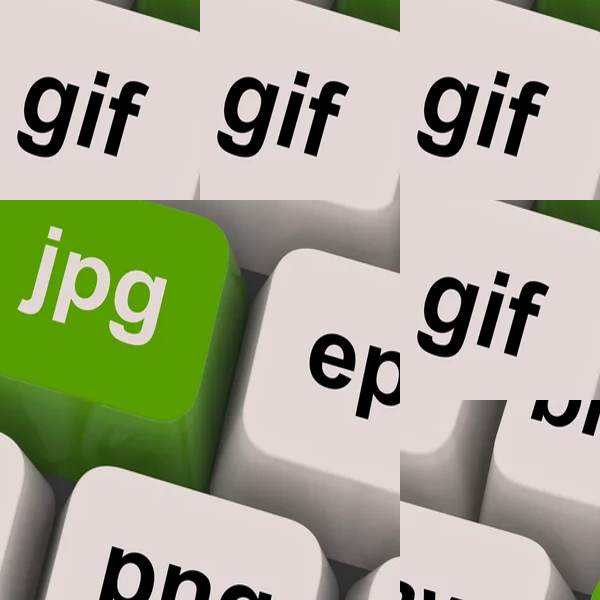

In [219]:
img = Image.open("jpg.jpg")
img = img.resize((600,600))
solve(img,{0:6,1:6,2:6,3:4,4:5,5:6,6:7,7:8,8:0})

### Получение ширины изображения из заголовка

Необходимо реализовать функцию solve. На вход функции подается имя файла изображения, файл находится в текущей директории. Необходимо прочитать данный файл в бинарном виде и определить его ширину в пикселях. Изображение имеет формат BMP. Функция должна вернуть число - ширину в пикселях.

In [244]:
def solve(img_name):
    img = open(img_name,'rb')
    from_ , to_ = 18,22

    img_arr = img.read().hex(' ').split(' ')[from_:to_]
    img_arr.reverse()
    
    width_str = ''.join(img_arr)
    
    width_int = int(width_str,16)
    return width_int


Тест:

In [247]:
width = solve('peppers.bmp')
img = Image.open('peppers.bmp')
width == img.width

True

### Получение высоты изображения из заголовка

Необходимо реализовать функцию solve. На вход функции подается имя файла изображения, файл находится в текущей директории. Необходимо прочитать данный файл в бинарном виде и определить его высоту в пикселях. Изображение имеет формат PNG. Функция должна вернуть число - высоту в пикселях.

In [255]:
def solve(img_name):
    from_,to_ = 20,24#пропускаем 8 байт подписи, 4 байта - размер чанка IHDR, 4 байта - имя чанка, 4 байта - ширина изображения
    img = open(img_name,'rb')
    img_arr = img.read().hex(' ').split(' ')[from_:to_]
    
    height_str = ''.join(img_arr)
    
    height_int = int(height_str,16)
    return height_int

In [256]:
height = solve('lion.png')

img = Image.open('lion.png')
img.height == height

True

### Получение формата изображения из заголовка
Необходимо реализовать функцию solve. На вход функции подается имя файла изображения, файл находится в текущей директории. Необходимо из заголовка выяснить какого типа это изображения (PNG, JPEG или BMP). Функция должна вернуть строку, одну из: 'PNG', 'JPEG', 'BMP'.

In [263]:
def solve(img_name):
    img = open(img_name,'rb')
    from_,to_ = 0,8
    img_arr = img.read().hex(' ').split(' ')[from_:to_]
    if img_arr[0] == 'ff' and img_arr[1] == 'd8':
        return 'JPEG'
    elif img_arr[0] == '42' and img_arr[1] == '4d':
        return 'BMP'
    else:
        return 'PNG'
    print(img_arr)

In [266]:
print(solve('jpg2.jpg'))
print(solve('lion.png'))
print(solve('peppers.bmp'))

JPEG
PNG
BMP


### Получение размера изображения в байтах из заголовка
Необходимо реализовать функцию solve. На вход функции подается имя файла изображения, файл находится в текущей директории. Необходимо прочитать данный файл в бинарном виде и определить его размер в байтах. Изображение имеет формат BMP. Функция должна вернуть число - количество байт.

Решение:

In [267]:
def solve(img_name):
    img = open(img_name,'rb')
    from_,to_ = 2,6
    
    img_size_arr = img.read().hex(' ').split(' ')[from_:to_]
    img_size_arr.reverse()
    
    img_size_str = ''.join(img_size_arr)
    img_size_int = int(img_size_str,16)
    return img_size_int

Тест:

In [268]:
solve('peppers.bmp')

786486

### Сортировка пикселей
Необходимо реализовать функцию solve, которая принимает на вход имя файла с изображением, файл находится в текущей директории. Функция должна осортировать все пиксели изображения по возрастанию суммы их компонентов (r+g+b). В результате функция должна вернуть изображение.

Решение:

In [269]:
from PIL import Image, ImageDraw
import numpy as np

    
def solve(file_path):
    img = Image.open(file_path)
    arr = np.array(img)
    list_ = []
    for i in arr:
        for j in i:
            list_.append(j)
    list_ = sorted(list_,key=lambda pix: pix.sum())
    list_2 = []
    k=0
    for i in range(img.size[1]):
        list_2.append([])
        for j in range(img.size[0]):
            list_2[i].append(list_[k])
            k+=1
        list_2[i] = np.array(list_2[i])
    list_2 = np.array(list_2)
    new_img = Image.fromarray(list_2) 
    return new_img

Тест:

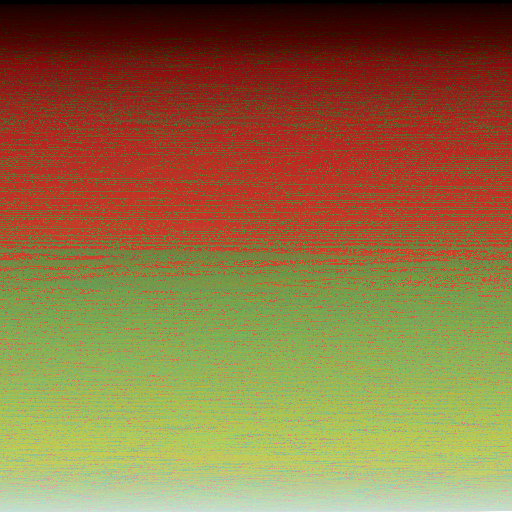

In [270]:
solve('peppers.bmp')